# A strategical Analysis of Directors, Genres, Budgets, and IMDb Scores for Strategic Decision-Making in Film Production

This strategical report aims to provide an analysis of the factors affecting  the success of films, By considering directors, genres, budgets, and IMDb scores. Through a combination of statistical analyses, visualizations, and interpretative summaries, this report aims to provide a strong idea for informed decision-making in film production

In [1]:
#this is a code cell. Write the code that you want to do things in it. Include some comments with the code to
#explain what you are doing, where appropriate.

myfile='movie_metadata.csv'
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

myfile = 'movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)
df.tail()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [2]:
# finding how many rows and columns are present
df.shape

(5043, 28)

In this cell you should write the basic background to your exploration of the data (you should explain to sufficient detail so that a reader who knows nothing about the dataset understands what it is that you are doing):

I have included below a VERY BASIC EXAMPLE to give you an idea of what to write:

Here I sort the mean imdb score and budget across films by genre. Set a minimum imdb score and filter according to that. We are interested only in high scores so we are only looking at films with good ratings.

In [3]:
genreseries=df.groupby('genres')[['imdb_score','budget']].mean()
#set the minimum imdb score that I care about to 8
min_imdb_score=8
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('imdb_score', ascending=False)
#print the genres for inspection
top_rated_genre.head()

,imdb_score,budget
genres,,
Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.8,NaN
Action|Adventure|Biography|Drama|History,8.6,NaN
Action|Drama|History|Thriller|War,8.5,4400000.0
Adventure|Animation|Drama|Family|Musical,8.5,45000000.0
Crime|Drama|Fantasy|Mystery,8.5,60000000.0


In this cell you should explain what your findings are and what this means.

I have included below a VERY BASIC EXAMPLE to give you an idea of what to write (note, here the explanation is over simple, yours should be much better):

There appears to be some well-rated genres that we could propose as better options to make a film. To examine if any of these good film genres can be made within our budget, I filtered by a maximum 500 000 and looked at the gross return.

In [4]:
#set the maximum possible budget to 500 000
max_budget = 500000
topgenreseries=df.groupby('genres')[['imdb_score','budget','gross']].mean()
#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<max_budget]
budget_genres = budget_genres.sort_values('imdb_score',ascending=False)
budget_genres.head()

,imdb_score,budget,gross
genres,,,
Documentary|Family,8.200,125000.0,NaN
Crime|Documentary,8.000,200000.0,2156472.5
Documentary|History|Music,7.800,400000.0,6757592.5
Biography|Documentary|Music,7.525,300000.0,6531469.5
Biography|Documentary,7.300,25109.0,592014.0


The Documentary|Family genre seems to be well-rated and within our budget. Taking a look at the details more closely we can see that there is actually only one film that meets the criteria of budget and imdb rating:

In [5]:
df[df['genres']=='Documentary|Family']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4945,Color,Amal Al-Agroobi,NaN,62.0,58.0,NaN,NaN,NaN,NaN,Documentary|Family,...,NaN,Arabic,United Arab Emirates,NaN,125000.0,2013.0,NaN,8.2,NaN,54


You should now go on from here and do further exploratory analyses and some appropriate statistical analyses on appropriate hypotheses...

Trying to know the size of data we got.

In [6]:
df.shape

(5043, 28)

Will have look at what are all the columns it contains

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Now will try to drop the unnecessary data like duplicates and null values.

In [8]:
df=df.dropna()
df = df.drop_duplicates(subset='movie_imdb_link', keep='first')
df.drop_duplicates(inplace=True)
df = df.drop([ 'movie_title', 'facenumber_in_poster', 'plot_keywords', 'country', 'movie_imdb_link'], axis=1)


After removing the duplicates and null values from the data, I will consider important aspects that will affect the movie's success: gross, genres, director, budget, and IMDb ratings.

Text(0.5, 1.0, 'Budget Distribution -  Box Plot ')

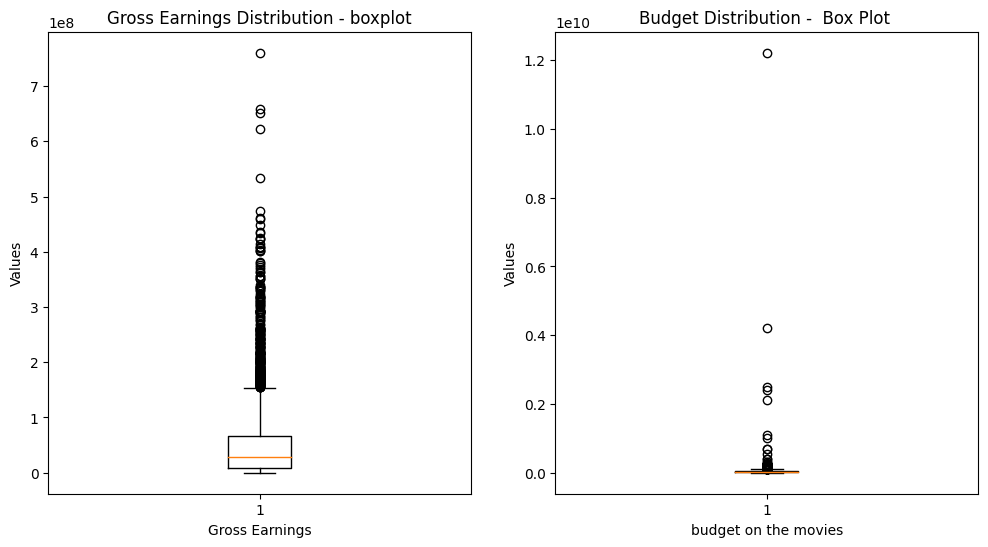

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['gross'])
plt.xlabel('Gross Earnings')
plt.ylabel('Values')
plt.title('Gross Earnings Distribution - boxplot')

plt.subplot(1, 2, 2)
plt.boxplot(df['budget'])
plt.xlabel('budget on the movies')
plt.ylabel('Values')
plt.title('Budget Distribution -  Box Plot ')

Now will see which are all directors having considerable gross

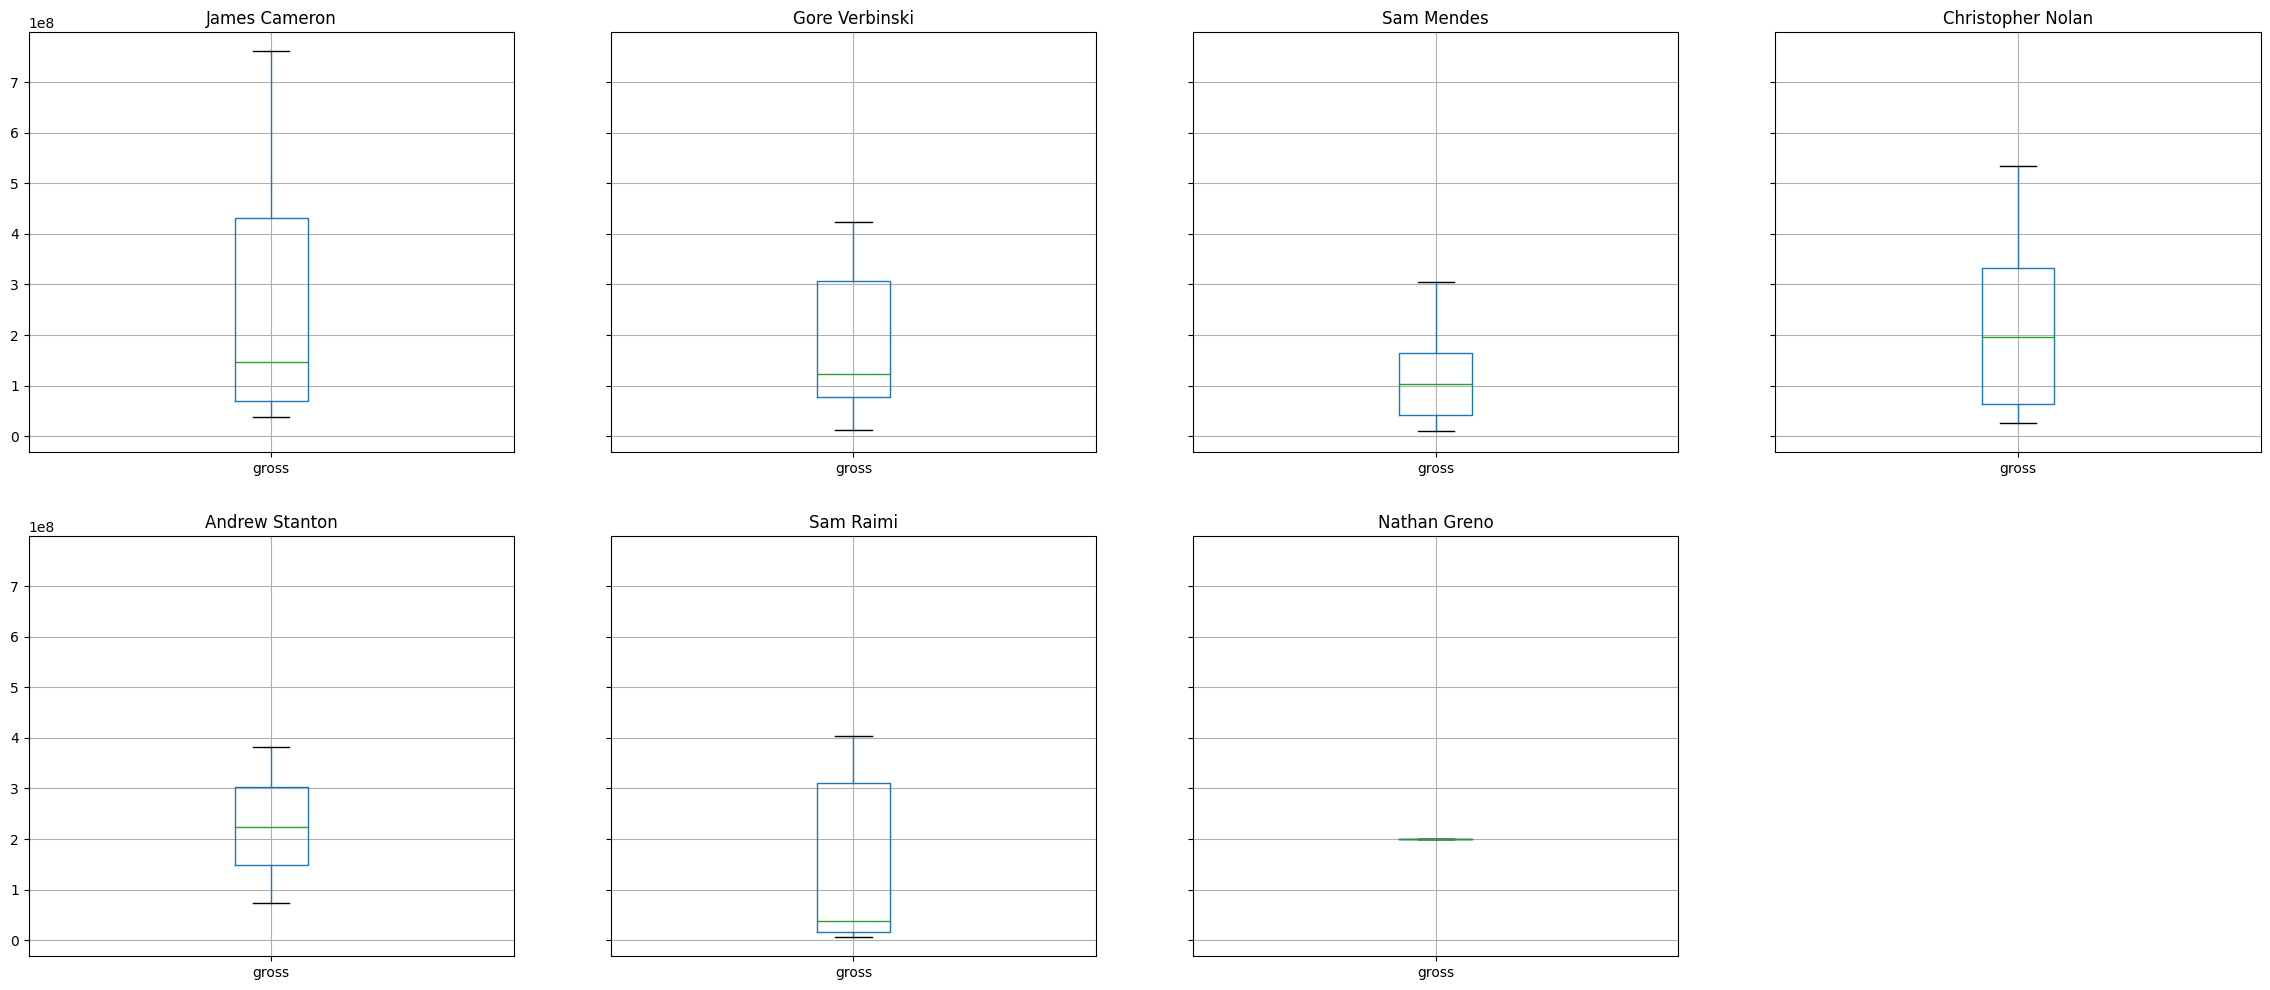

In [10]:
import matplotlib.pyplot as plt

unique_directors = df['director_name'].unique()

fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True)

for idx, (director, ax) in enumerate(zip(unique_directors, axes.flat)):
    df_director = df[df['director_name'] == director]
    df_director.boxplot(column='gross', ax=ax)
    ax.set_title(director)

fig.delaxes(axes[1][3])

fig.set_figwidth(fig.get_figwidth() * 4.5)
fig.set_figheight(fig.get_figheight() * 2.5)

plt.show()

From the above we can see the list of directors shows that film by James Cameron and Sam Raimi and then Christopher Nolan having the maximum range of 'gross' value

Now wil see the which genres having huge craze and making good gross

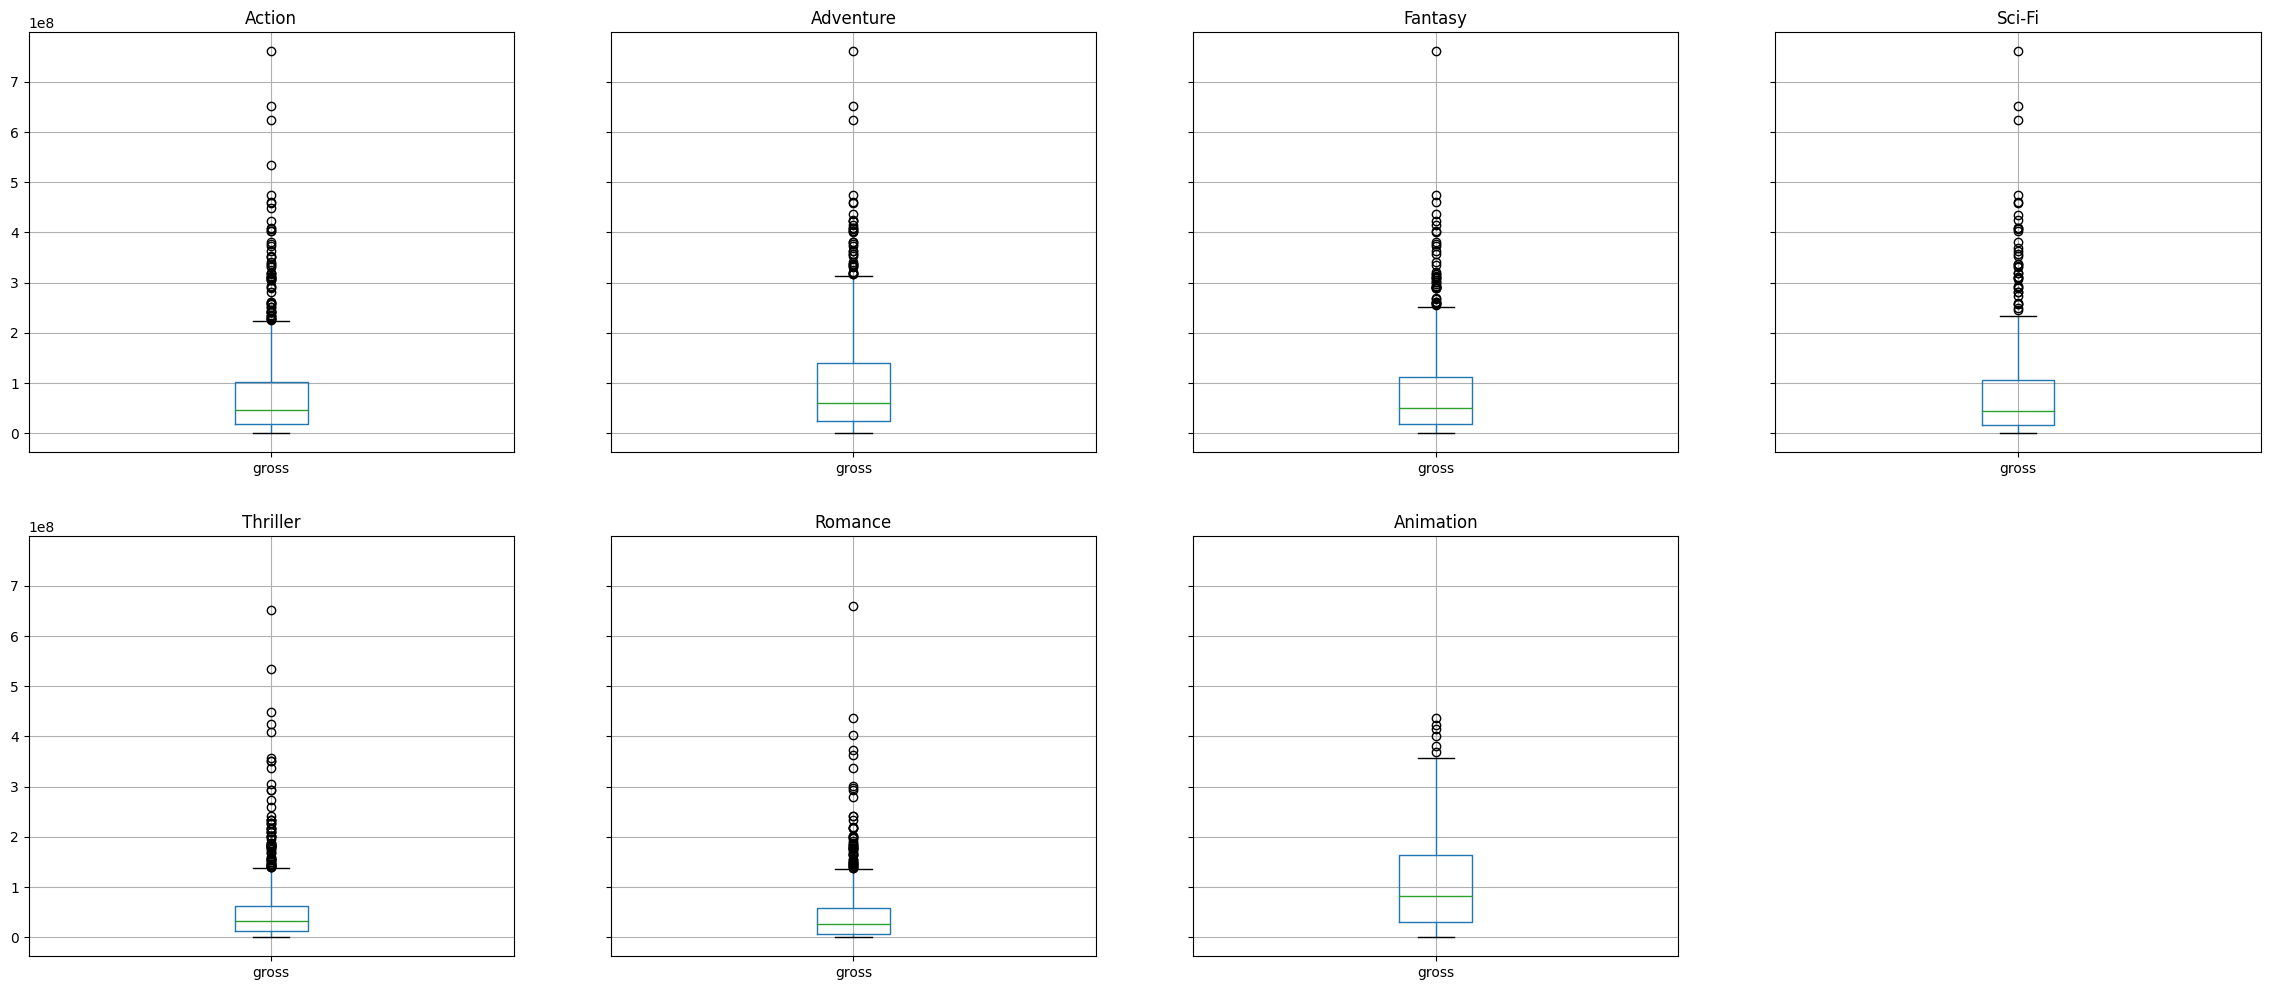

In [11]:
unique_genres = df['genres'].str.split('|', expand=True).stack().unique()

fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True)

for idx, (genre, ax) in enumerate(zip(unique_genres, axes.flat)):
    df2_genre = df[df['genres'].str.contains(genre)]
    df2_genre.boxplot(column='gross', ax=ax)
    ax.set_title(genre)

fig.delaxes(axes[1][3])

fig.set_figwidth(fig.get_figwidth() * 4.5)
fig.set_figheight(fig.get_figheight() * 2.5)

plt.show()

From the plots we can clearly say that Adventure,fantasy, Sci-fi and Action movies are making good gross.

In the future, we can consider these genres and directors for achieving greater success.

In order to guess the Hypothesis will check some relation between different columns

First will compare between the gross and budget

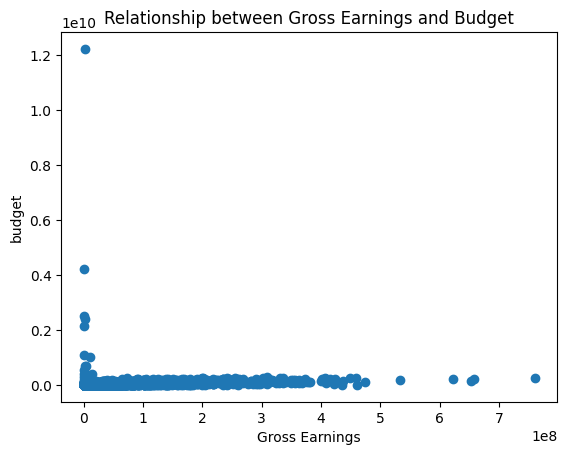

In [12]:
plt.scatter(df['gross'], df['budget'])

plt.xlabel('Gross Earnings')
plt.ylabel('budget')
plt.title('Relationship between Gross Earnings and Budget')

plt.show()

Now will compare between the gross and Imdb rating

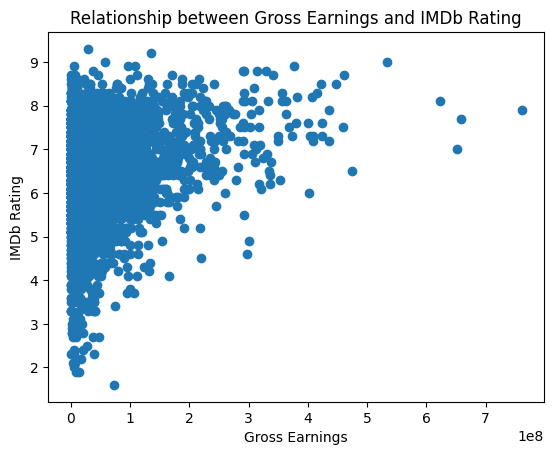

In [13]:
plt.scatter(df['gross'], df['imdb_score'])

plt.xlabel('Gross Earnings')
plt.ylabel('IMDb Rating')
plt.title('Relationship between Gross Earnings and IMDb Rating')

plt.show()

Now, will start with Hypothesis

Hypothesis 1: Higher budget leads to higher gross earnings

In [14]:
import scipy.stats as stats

high_budget = df[df['budget'] > 0]['gross']
low_budget = df[df['budget'] <= 0]['gross']


z_statistic1, p_value1 = stats.ttest_ind(high_budget, low_budget)

print("Hypothesis 1: Higher budget leads to higher gross earnings")
print("Z-statistic:", z_statistic1)
print("P-value:", p_value1)

Hypothesis 1: Higher budget leads to higher gross earnings
Z-statistic: nan
P-value: nan


 Based on above result,we can reject the null hypothesis and can say that there is a statistically significant difference in the means of the two groups. This means that movies with high budgets tend to have higher gross earnings than movies with low budgets.

Hypothesis 2: Higher imdb_rating leads to higher gross earnings


In [15]:
high_imdb_ratings = df[df['imdb_score'] > 0]['gross']
low_imdb_ratings = df[df['imdb_score'] <= 0]['gross']

z_statistic2, p_value2 = stats.ttest_ind(high_imdb_ratings, low_imdb_ratings)

print("Hypothesis 2: Higher imdb_rating leads to higher gross earnings")
print("Z-statistic:", z_statistic2)
print("P-value:", p_value2)

Hypothesis 2: Higher imdb_rating leads to higher gross earnings
Z-statistic: nan
P-value: nan


Based on above result,we can reject the null hypothesis and can say that there is a statistically significant difference in the means of the two groups.  This means that movies with high IMDb ratings tend to have higher gross earnings than movies with low IMDb ratings.

To constrain our experiment need to know min and max values of budget and gross

In [18]:
summary_data = df[['gross', 'budget']].describe()
print(summary_data)

              gross        budget
count  3.656000e+03  3.656000e+03
mean   5.176226e+07  4.575375e+07
std    6.922863e+07  2.288247e+08
min    1.620000e+02  2.180000e+02
25%    7.940690e+06  1.000000e+07
50%    2.916831e+07  2.500000e+07
75%    6.646686e+07  5.000000e+07
max    7.605058e+08  1.221550e+10


Now, we can suggest director and genres based on the given budget with minimum returns of 2 times of budget

In [20]:
fixing_budget = 5000000

# Filter data based on budget and gross criteria
selected_films = df[(df['budget'] <= fixing_budget) & (df['gross'] > fixing_budget*2 )]

# Display details of selected director, genres
sorted_films = selected_films.sort_values(by='gross', ascending=False)
top_10_grossing_films = sorted_films[:10]
print(top_10_grossing_films[['director_name', 'genres', 'gross','imdb_score']].sort_values(by='imdb_score', ascending=False))

         director_name                            genres        gross  \
3867      Milos Forman                             Drama  112000000.0   
3970    Victor Fleming         Drama|History|Romance|War  198655278.0   
4530  John G. Avildsen                       Drama|Sport  117235247.0   
4168        Mel Brooks                    Comedy|Western  119500000.0   
4449  William Cottrell  Animation|Family|Fantasy|Musical  184925485.0   
4046       John Landis                            Comedy  141600000.0   
4674      George Lucas                Comedy|Drama|Music  115000000.0   
3737        Joel Zwick             Comedy|Family|Romance  241437427.0   
4707     Daniel Myrick                            Horror  140530114.0   
4793         Oren Peli                            Horror  107917283.0   

      imdb_score  
3867         8.7  
3970         8.2  
4530         8.1  
4168         7.8  
4449         7.7  
4046         7.6  
4674         7.5  
3737         6.6  
4707         6.4  
4793  

Finally again sorted by based on top imdb_score, to enhance the successful choice

Proving the relation between 'gross', 'budget' and 'imdb_score'

In [17]:
# Calculate correlation coefficients between key variables
correlation_matrix = df[['gross', 'budget', 'imdb_score']].corr()
print(correlation_matrix)

               gross    budget  imdb_score
gross       1.000000  0.093887    0.216461
budget      0.093887  1.000000    0.029622
imdb_score  0.216461  0.029622    1.000000


Actionable recommendations based on the analyses

1.Prioritize compelling narratives and engaging cinematography for films, leveraging the strong correlation between IMDb rating and gross earnings.

2.Tailor film genres to match audience preferences using feedback and market research insights.

3.Invest in effective marketing, including social media and influencer collaborations, for increased awareness and buzz.

# Summary


Based on the analysis of genres with high IMDb scores in the proposed budget of 5000000, the studio recommends exploring genres such as "Drama|History|Romance|War"

the correlation matrix shows us that IMDb ratings are a more important predictor of gross profit than budget. Although high-budget films have a slight advantage, IMDb ratings seem to play a more important role in determining the financial success of a film.

Consideration of the director's choice, genre preferences, and market-specific strategies should be integral to the decision-making process.